<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-swissflyer/blob/main/Copy_of_DATA_301_Lab_1B_Collin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

Saving Data 301 Class Survey Responses - Form Responses 1.csv to Data 301 Class Survey Responses - Form Responses 1.csv


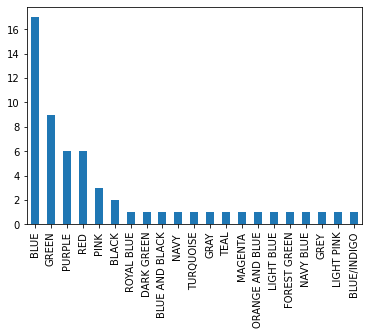

In [ ]:
from google.colab import files
uploaded = files.upload()

import io

import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Data 301 Class Survey Responses - Form Responses 1.csv']))
df["color"] = df["What is your favorite color?"].astype("string")
df["color"] = df["color"].str.upper()
df_color = df["color"].value_counts()

df_color.plot.bar()


I see that most people like blue while very few like grey

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

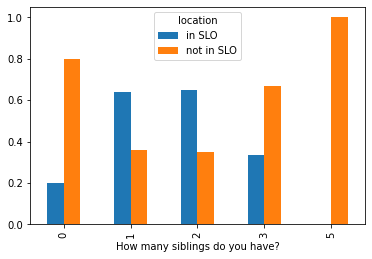

In [ ]:
#df
def class_to_type(c):
  #Can i assume this for absent?
  if pd.isna(c):
    return "not in SLO"  
  elif "outside" in c:
    return "not in SLO"
  else:
    return "in SLO"

df["location"] = df["Where are you living this quarter?"].map(class_to_type)

joint_sibling_SLO = pd.crosstab(df["location"], df["How many siblings do you have?"], 
                                    normalize=True)
#joint_sibling_SLO

marginial_sibling_SLO = joint_sibling_SLO.sum(axis=0)
#marginial_sibling_SLO
conditional_sibling_slo = joint_sibling_SLO.divide(marginial_sibling_SLO, axis = 1)
conditional_sibling_slo
conditional_sibling_slo.T.plot.bar()

I do not see a relationsip between siblings and whether or not they live in SLO. Each index does not provide a correlation to what may be next

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [ ]:
def class_to_type(c):
  #Can i assume this for absent?
  if pd.isna(c):
    return "not in SLO"
  elif c < 10000:
    return "less than 10000"
  elif c < 100000:
    return "10,000 to 100,000"
  elif c < 250000:
    return "250,000 to 500,000"
  elif c < 500000:
    return "250,000 to 500,000"
  else:
    return "more than 500,000"

df["How Many Golf Balls"] = df["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"].map(class_to_type)
df
joint_major_golf = pd.crosstab(df["What is your major?"], df["How Many Golf Balls"], 
                                    normalize=True)
#joint_major_golf

marginial_major_golf = joint_major_golf.sum(axis=1)
marginial_major_golf
conditional_major_golf = joint_major_golf.divide(marginial_major_golf, axis = 0)
conditional_major_golf






How Many Golf Balls,"10,000 to 100,000","250,000 to 500,000",less than 10000,"more than 500,000"
What is your major?,,,,
Computer Science,0.310345,0.241379,0.034483,0.413793
Other,0.142857,0.142857,0.357143,0.357143
Statistics,0.200000,0.200000,0.133333,0.466667


With one answer being 366,000  balls. It appears that the largest percentage of students that got within the rangle of 250,000 to 500,000 were Computer Science. I chose using "major" as a comparision to see if different majors may have used what they have learned in their coursework to approach the problem in a different way.

## Question 4

Write and answer your own question using this data set.

In [ ]:
#Is there a relationship between considering oneself a sports fan, and whether one enjoys videogames? 
joint_sport_videogames = pd.crosstab(df["Do you consider yourself a sports fan?"], df["Do you enjoy video games?"], 
                                    normalize=True)
joint_sport_videogames

marginial_sport_videogames = joint_sport_videogames.sum(axis=1)
marginial_sport_videogames
conditional_sport_videogames = joint_sport_videogames.divide(marginial_sport_videogames, axis = 0)
conditional_sport_videogames

#It appears that considering oneself as a sport fan has no relationship to if one enjoys video games.


Do you enjoy video games?,No,Yes
Do you consider yourself a sports fan?,,
No,0.225806,0.774194
Yes,0.222222,0.777778
